In [96]:
import numpy as np
import pandas as pd

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [98]:
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\cognifyz\Dataset .csv")
df

pd.set_option('display.max_columns', None)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# Data Cleaning

In [99]:
df.shape

(9551, 21)

In [100]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [102]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [103]:
Numerical_columns = df.select_dtypes(exclude='object').columns
Numerical_columns

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [104]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [105]:
df.duplicated().sum()

0

In [106]:
continous = ['Longitude','Latitude', 'Aggregate rating', 'Average Cost for two']
continous

['Longitude', 'Latitude', 'Aggregate rating', 'Average Cost for two']

In [107]:
discrete_count = ['Restaurant ID', 'Country Code', 'Votes']
discrete_count

['Restaurant ID', 'Country Code', 'Votes']

In [108]:
discrete_categorical = ['City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency',
                       'Has Table Booking', 'Has Online Delivery', 'Is Delivering Now', 'Switch to Order Menu',
                       'Rating Color', 'Rating Text']
discrete_categorical

['City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table Booking',
 'Has Online Delivery',
 'Is Delivering Now',
 'Switch to Order Menu',
 'Rating Color',
 'Rating Text']

In [109]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [111]:
# Fill missing values in the 'Cuisines' column with the mode
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)


In [112]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Leve1 1 

# Task 1 : Top Cuisines

In [113]:
df.shape

(9551, 21)

In [114]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [115]:
df['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [116]:
Cuisines_count = df['Cuisines'].str.split(',').explode('Cuisines').value_counts()
print(Cuisines_count)


Cuisines
North Indian      3001
 Chinese          1880
 Fast Food        1314
 North Indian      968
Chinese            855
                  ... 
 Mineira             1
Charcoal Grill       1
Peranakan            1
 Ramen               1
 World Cuisine       1
Name: count, Length: 249, dtype: int64


**Top 3 cuisines**

In [117]:
# Top 3 cuisine are

Top_three_Cuisines = Cuisines_count.head(3)

print('Top_three_Cuisines', Top_three_Cuisines)


Top_three_Cuisines Cuisines
North Indian    3001
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64


<BarContainer object of 3 artists>

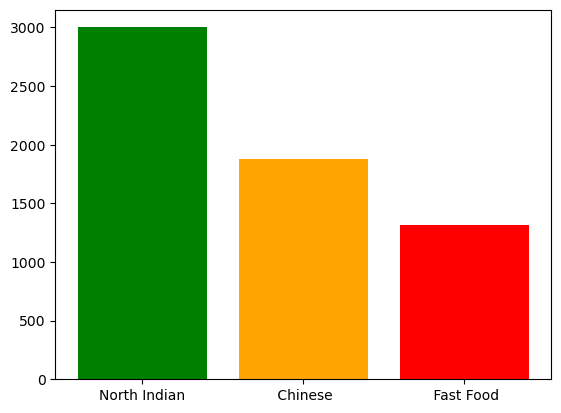

In [118]:
colors = ['Green','Orange','Red']

plt.bar(Top_three_Cuisines.index, Top_three_Cuisines.values, color = colors)

**Calculate 
the 
percentage 
of
 restaurants that serve each of the top
 cuisines**

In [119]:
Total_restaurants = len(df)
print('total_restaurants: ', Total_restaurants)

percentage_per_Cuisines = (Top_three_Cuisines / Total_restaurants) * 100
percentage_per_Cuisines

total_restaurants:  9551


Cuisines
North Indian    31.420794
 Chinese        19.683803
 Fast Food      13.757722
Name: count, dtype: float64

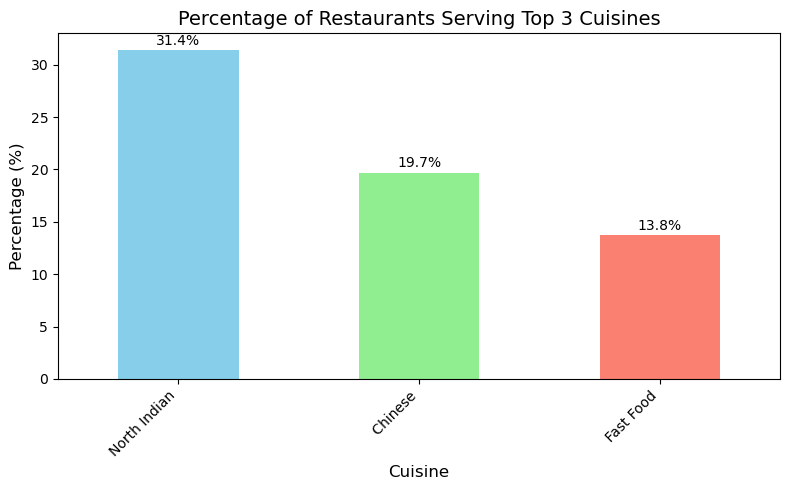

In [120]:
# Plotting the bar graph
plt.figure(figsize=(8, 5))
bars = percentage_per_Cuisines.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])


plt.title('Percentage of Restaurants Serving Top 3 Cuisines', fontsize=14)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')


for bar in bars.patches:  # Access patches from the bar plot
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', fontsize=10)


plt.tight_layout()
plt.show()


# Leval 1 

# Task 2 : City Analysis

**Identify the city with the highest number
 of restaurants in the dataset**

In [121]:
city_restaurant_count = df['City'].value_counts()


top_city = city_restaurant_count.idxmax()
top_city_count = city_restaurant_count.max()

print(f"The city with the highest number of restaurants is {top_city} with {top_city_count} restaurants.")


The city with the highest number of restaurants is New Delhi with 5473 restaurants.


**Calculate 
the average rating for
 restaurants in each city**

In [122]:
average_rating_per_city = df.groupby('City')['Aggregate rating'].mean().reset_index()

average_rating_per_city.columns = ['City', 'Average Rating']
print(average_rating_per_city)

                City  Average Rating
0          Abu Dhabi        4.300000
1               Agra        3.965000
2          Ahmedabad        4.161905
3             Albany        3.555000
4          Allahabad        3.395000
..               ...             ...
136          Weirton        3.900000
137  Wellington City        4.250000
138   Winchester Bay        3.200000
139          Yorkton        3.300000
140        ��stanbul        4.292857

[141 rows x 2 columns]


**Determine the city with the highest
 average rating**

In [123]:
average_rating_per_city = df.groupby('City')['Aggregate rating'].mean()


city_with_highest_rating = average_rating_per_city.idxmax()
highest_rating = average_rating_per_city.max()

print(f"The city with the highest average rating is {city_with_highest_rating} with a rating of {highest_rating:.2f}")


The city with the highest average rating is Inner City with a rating of 4.90


# Level 1

# Task 3: Price Range Distribution

**Create a histogram or bar chart to
 visualize the distribution of price ranges
 among the restaurants**

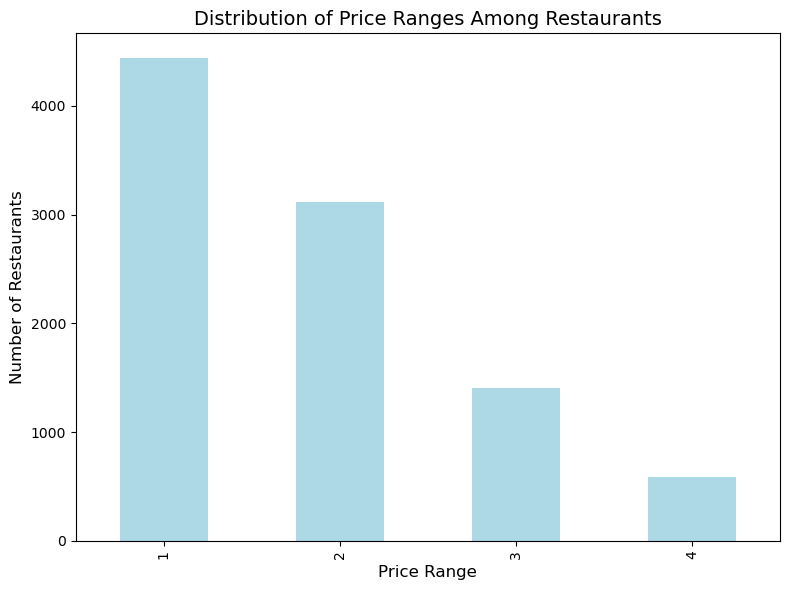

In [124]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
df['Price range'].value_counts().sort_index().plot(kind='bar', color='lightblue')


plt.title('Distribution of Price Ranges Among Restaurants', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)

plt.tight_layout()
plt.show()


**Calculate the percentage of restaurants
 in each price range category**

In [125]:
total_restaurants = len(df)

price_range_counts = df['Price range'].value_counts()
percentage_price_range = (price_range_counts / total_restaurants) * 100
print(percentage_price_range)


Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


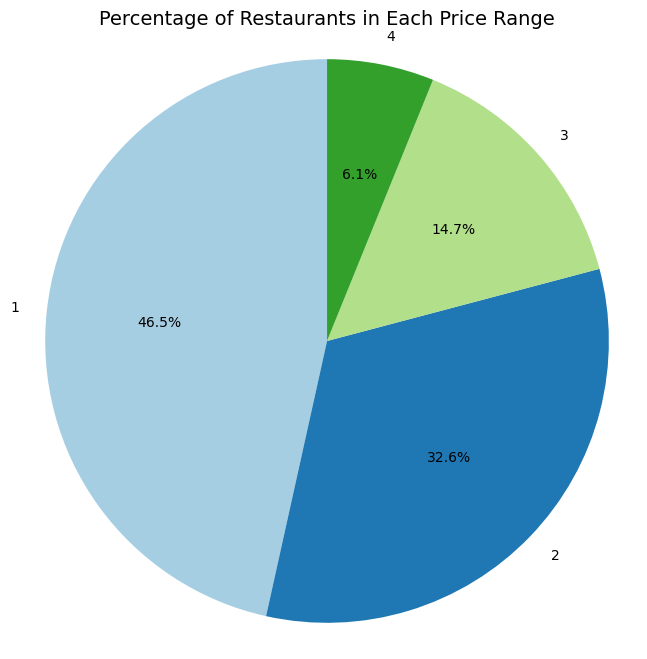

In [126]:

plt.figure(figsize=(8, 8))
plt.pie(percentage_price_range, labels=percentage_price_range.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Percentage of Restaurants in Each Price Range', fontsize=14)


plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

# Leval 1 

# Task 4: Online Delivery

**Determine the percentage of restaurants that offer online delivery**

In [127]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [128]:

total_restaurants = len(df)

delivery_restaurants = df[df['Has Online delivery'] == 'Yes'].shape[0]

percentage_delivery = (delivery_restaurants / total_restaurants) * 100

print(f"Percentage of restaurants offering online delivery: {percentage_delivery:.2f}%")


Percentage of restaurants offering online delivery: 25.66%


**Compare the average ratings of restaurants
 with and without online delivery.**

In [129]:
delivery_restaurants = df[df['Has Online delivery'] == 'Yes']
no_delivery_restaurants = df[df['Has Online delivery'] == 'No']

avg_rating_with_delivery = delivery_restaurants['Aggregate rating'].mean()
avg_rating_without_delivery = no_delivery_restaurants['Aggregate rating'].mean()

print(f"Average rating of restaurants with online delivery: {avg_rating_with_delivery:.2f}")
print(f"Average rating of restaurants without online delivery: {avg_rating_without_delivery:.2f}")


Average rating of restaurants with online delivery: 3.25
Average rating of restaurants without online delivery: 2.47


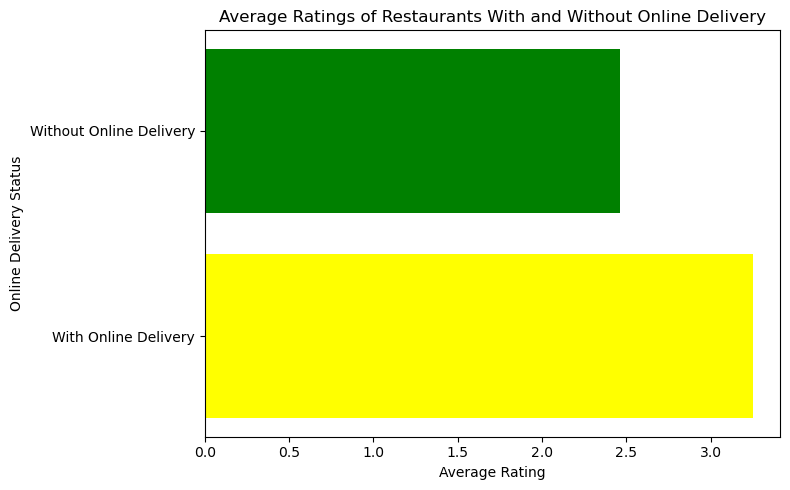

In [130]:
# bar chart
avg_ratings = [avg_rating_with_delivery, avg_rating_without_delivery]
labels = ['With Online Delivery', 'Without Online Delivery']
colors = ['yellow', 'green']

plt.figure(figsize=(8, 5))
plt.barh(labels, avg_ratings, color=colors)

plt.title('Average Ratings of Restaurants With and Without Online Delivery')
plt.xlabel('Average Rating')
plt.ylabel('Online Delivery Status')

# Display the plot
plt.tight_layout()
plt.show()


# LEVEL 2

# Task 1 : Restaurant Ratings

**Analyze the distribution of aggregate
 ratings and determine the most common
 rating range.**

In [131]:
agg_rating_distribution = df['Aggregate rating'].value_counts()
agg_rating_distribution

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [132]:
a = agg_rating_distribution.idxmax()
print("most common rating is : ", a)

most common rating is :  0.0


In [133]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

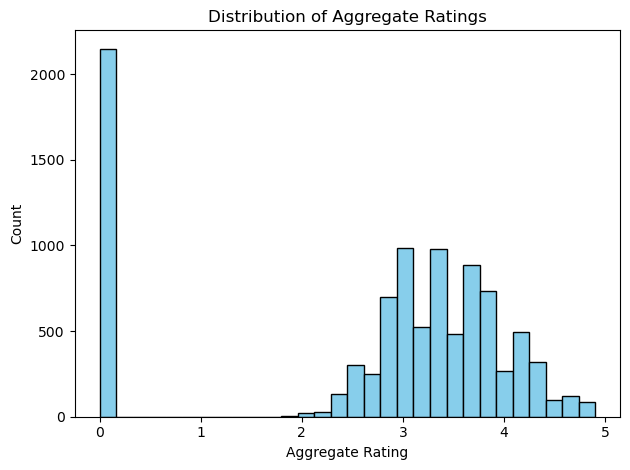

In [134]:

# Plotting the histogram for 'Aggregate rating'
plt.hist(df['Aggregate rating'], bins=30, color='skyblue', edgecolor='black')


plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.title('Distribution of Aggregate Ratings')


plt.tight_layout()
plt.show()


**Calculate the average number of votes
 received by restaurants**

In [135]:
average_votes = df['Votes'].mean()
print("Average number of votes received by restaurants:", average_votes)


Average number of votes received by restaurants: 156.909747670401


# Level 2

# Task 2 :  Cuisine Combination

**Identify the most common combinations of
 cuisines in the dataset**

In [136]:
common_combinations = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False)

top_10 = common_combinations.head(10)
top_10


Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64

**Determine if certain cuisine combinations
 tend to have higher ratings**

In [137]:
max_rating = common_combinations.iloc[0]
max_rating

4.9

In [138]:
max_rated_rest = df.loc[df['Aggregate rating'] == max_rating]
print('Restaurant having maximum rating', max_rated_rest['Restaurant Name'] )

Restaurant having maximum rating 3                                           Ooma
8       Spiral - Sofitel Philippine Plaza Manila
10                              Silantro Fil-Mex
39                                    Coco Bambu
48                            Braseiro da G��vea
                          ...                   
9484              Restaurant Mosaic @ The Orient
9514                            Ministry of Crab
9524                                Gaga Manjero
9538                                   Starbucks
9540                            Draft Gastro Pub
Name: Restaurant Name, Length: 61, dtype: object


# Level 2

# Task 3 : Geographic Analysis

**Plot the locations of restaurants on a
 map using longitude and latitude
 coordinates**

In [158]:
import geopandas


import folium
#from folium.plugins import Heatmap

In [140]:
print(df[['Longitude', 'Latitude' ]])

       Longitude   Latitude
0     121.027535  14.565443
1     121.014101  14.553708
2     121.056831  14.581404
3     121.056475  14.585318
4     121.057508  14.584450
...          ...        ...
9546   28.977392  41.022793
9547   29.041297  41.009847
9548   29.034640  41.055817
9549   29.036019  41.057979
9550   29.026016  40.984776

[9551 rows x 2 columns]


In [146]:
import geopandas as gpd

df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,geometry
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,POINT (121.02754 14.56544)
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,POINT (121.0141 14.55371)
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,POINT (121.05683 14.5814)
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,POINT (121.05648 14.58532)
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,POINT (121.05751 14.58445)


In [150]:
import geopandas as gpd

# Assuming 'df' is your original DataFrame with 'Longitude' and 'Latitude' columns
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Ensure that the GeoDataFrame has been correctly created by checking its head
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,geometry
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,POINT (121.02754 14.56544)
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,POINT (121.0141 14.55371)
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,POINT (121.05683 14.5814)
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,POINT (121.05648 14.58532)
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,POINT (121.05751 14.58445)


**Identify any patterns or clusters of
 restaurants in specific areas**

In [159]:
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]


In [160]:
heat_data

[[14.565443, 121.027535],
 [14.553708, 121.014101],
 [14.581404, 121.056831],
 [14.585318, 121.056475],
 [14.58445, 121.057508],
 [14.583764, 121.056314],
 [14.53133333, 120.9796667],
 [14.54, 120.9793333],
 [14.55299, 120.98009],
 [14.572041, 121.056532],
 [14.567689, 121.057916],
 [14.570849, 121.06082],
 [14.649503, 121.075419],
 [14.59345, 121.0335917],
 [14.59889, 121.03811],
 [14.237082, 121.05704],
 [14.23767897, 121.0565874],
 [14.101834, 120.951589],
 [14.55436, 121.045878],
 [14.549337, 121.04622],
 [14.545858, 121.053725],
 [14.54565535, 121.0534998],
 [-15.76414167, -47.88178889],
 [-15.7775, -47.88266667],
 [-15.75747222, -47.88213611],
 [-15.75883333, -47.88816667],
 [-15.83116667, -47.91566667],
 [-15.831, -47.91566667],
 [-15.82, -47.9075],
 [-15.82733333, -47.91016667],
 [-15.797, -47.89016667],
 [-15.83133333, -47.92366667],
 [-15.83716667, -48.019],
 [-15.839775, -48.01909167],
 [-15.83483333, -48.01666667],
 [-15.7865, -47.889],
 [-15.860621, -47.872359],
 [-15.8345

In [161]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,geometry,Cluster
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,POINT (121.02754 14.56544),0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,POINT (121.0141 14.55371),0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,POINT (121.05683 14.5814),0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,POINT (121.05648 14.58532),0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,POINT (121.05751 14.58445),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,POINT (28.97739 41.02279),3
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,POINT (29.0413 41.00985),3
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,POINT (29.03464 41.05582),3
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,POINT (29.03602 41.05798),3


# Level 2 

# Task 4: Restaurant Chains

**Identify if there are any restaurant chains
 present in the dataset**

In [163]:

restaurant_counts = df['Restaurant Name'].value_counts()

restaurant_chains = restaurant_counts[restaurant_counts > 1]

print("Restaurant Chains in the dataset:")
print(restaurant_chains)


Restaurant Chains in the dataset:
Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


**Analyze the ratings and popularity of
 different restaurant chains**
 

In [166]:
restaurant_counts = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts > 1]

chain_ratings = df[df['Restaurant Name'].isin(restaurant_chains.index)]
chain_analysis = chain_ratings.groupby('Restaurant Name').agg(
    average_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum')
).reset_index()

chain_analysis_sorted = chain_analysis.sort_values(by=['average_rating', 'total_votes'], ascending=[False, False])

chain_analysis_sorted




,Restaurant Name,average_rating,total_votes
629,Talaga Sampireun,4.900,5514
8,AB's Absolute Barbecues,4.850,3151
589,Silantro Fil-Mex,4.850,1364
7,AB's - Absolute Barbecues,4.825,13400
449,Naturals Ice Cream,4.800,3094
...,...,...,...
440,Murliwala Bakers,0.000,0
538,Rajdhani Restaurant,0.000,0
616,Street Cafe,0.000,0
645,The Big Scoop,0.000,0


# Level 3 

# Task 1 :  Restaurant Reviews

In [167]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'geometry', 'Cluster'],
      dtype='object')

**Analyze the text reviews to identify the most
 common positive and negative keyword**s

In [170]:
positive_data = df.loc[df['Aggregate rating'] > 2.5]
positive_data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,geometry,Cluster
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,POINT (121.02754 14.56544),0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,POINT (121.0141 14.55371),0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,POINT (121.05683 14.5814),0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,POINT (121.05648 14.58532),0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,POINT (121.05751 14.58445),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,POINT (28.97739 41.02279),3
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,POINT (29.0413 41.00985),3
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,POINT (29.03464 41.05582),3
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,POINT (29.03602 41.05798),3


In [173]:
positive_keywords = positive_data['Rating text'].unique()
positive_keywords

array(['Excellent', 'Very Good', 'Good', 'Average'], dtype=object)

(array([ 301.,    0.,    0., 1079.,    0.,    0., 2100.,    0.,    0.,
        3627.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

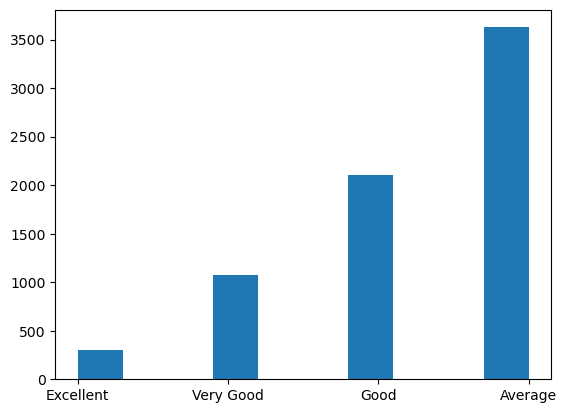

In [174]:
plt.hist(positive_data['Rating text'], label = positive_keywords)

NameError: name 'negative_data' is not defined

In [176]:
negative_data = df.loc[df['Aggregate rating'] <= 2.5]
negative_data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,geometry,Cluster
30,6600060,Sandubas Caf��,30,Bras�_lia,"Edif�_cio Jos�� Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Bras�_lia",-47.890167,-15.797000,"Brazilian, Cafe",30,Brazilian Real(R$),No,No,No,No,1,0.0,White,Not rated,2,POINT (-47.89017 -15.797),2
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",70,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,1,POINT (-43.34116 -22.87041),2
69,6710645,Cantinho da Gula,30,S��o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...",Itaim Bibi,"Itaim Bibi, S��o Paulo",-46.675667,-23.581000,Brazilian,55,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,0,POINT (-46.67567 -23.581),2
77,6701419,Divino Fog��o,30,S��o Paulo,"Shopping Metr�� Santa Cruz - Piso L2, Rua Domi...","Shopping Metr�� Santa Cruz, Vila Mariana","Shopping Metr�� Santa Cruz, Vila Mariana, S��o...",-46.637167,-23.599500,"Brazilian, Mineira",65,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,2,POINT (-46.63717 -23.5995),2
78,6703956,Super Grill,30,S��o Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, S��o Paulo",-46.698574,-23.622925,Brazilian,50,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,2,POINT (-46.69857 -23.62292),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,18255132,The Grand,1,Noida,"G-5, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557852,"Raw Meats, Fast Food",250,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1,POINT (77.36719 28.55785),0
9306,7001208,De Fontein Belgian Beer Cafe,148,Auckland,"75-79 Tamaki Drive, Mission Bay, Auckland",Mission Bay,"Mission Bay, Auckland",174.832089,-36.848315,European,100,NewZealand($),No,No,No,No,4,2.3,Red,Poor,402,POINT (174.83209 -36.84832),4
9351,18273002,Damascena Coffee House,215,Birmingham,"133 Alcester Road, Moseley, Birmingham",Moseley,"Moseley, Birmingham",-1.888555,52.446302,"Greek, Mediterranean, Middle Eastern",20,Pounds(��),No,No,No,No,2,0.0,White,Not rated,3,POINT (-1.88856 52.4463),3
9498,5800634,Elite Indian Restaurant,191,Colombo,"124, New Bullers Road, Bambalapitiya, Colombo 04","Bambalapitiya, Colombo 04","Bambalapitiya, Colombo 04, Colombo",79.857830,6.896084,"North Indian, Chinese, Sri Lankan",1800,Sri Lankan Rupee(LKR),No,No,No,No,2,2.4,Red,Poor,240,POINT (79.85783 6.89608),0


In [177]:
negative_keywords = negative_data['Rating text'].unique()
negative_keywords

array(['Not rated', 'Poor', 'Average'], dtype=object)

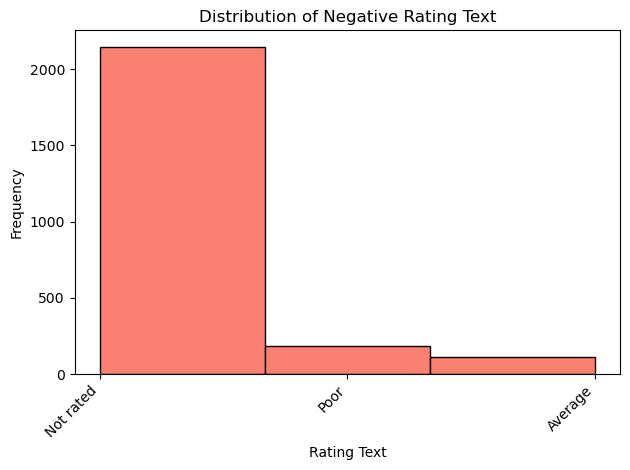

In [178]:
plt.hist(negative_data['Rating text'], bins=len(negative_keywords), color='salmon', edgecolor='black')
plt.title('Distribution of Negative Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Display the plots
plt.tight_layout()
plt.show()

# Level 3

# Task 2 : Votes Analysis

**Identify the restaurants with the highest and
 lowest number of votes**

In [181]:

highest_votes = df.loc[df['Votes'].idxmax()]

lowest_votes = df.loc[df['Votes'].idxmin()]

print("Restaurant with the highest number of votes:")
print(highest_votes[['Restaurant Name', 'Votes']])

print("\nRestaurant with the lowest number of votes:")
print(lowest_votes[['Restaurant Name', 'Votes']])


Restaurant with the highest number of votes:
Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object

Restaurant with the lowest number of votes:
Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object


**Analyze if there is a correlation between the
 number of votes and the rating of a
 restaurant**

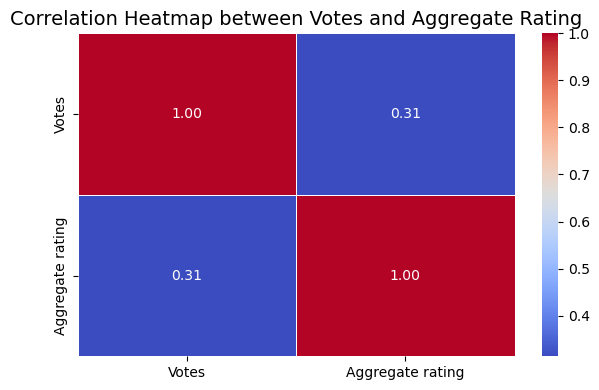

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df[['Votes', 'Aggregate rating']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Adding title
plt.title('Correlation Heatmap between Votes and Aggregate Rating', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


# Leve; 3

# Task 3: Price Range vs. Online Delivery and Table Booking

 **Analyze if there is a relationship between the
 price range and the availability of online
 delivery and table booking.**
 
**Determine if higher-priced restaurants are
 more likely to offer these services**

<Figure size 1000x600 with 0 Axes>

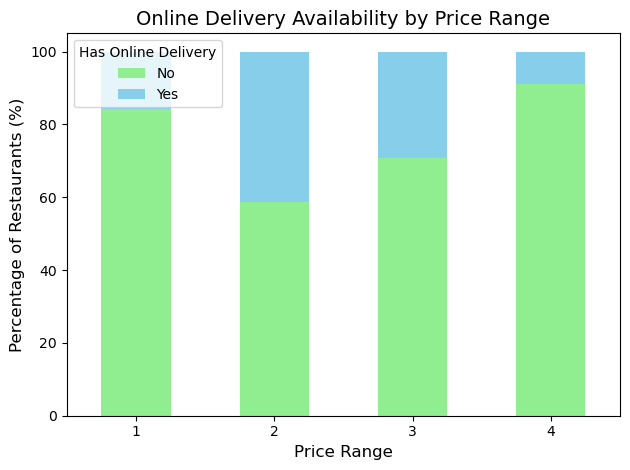

<Figure size 1000x600 with 0 Axes>

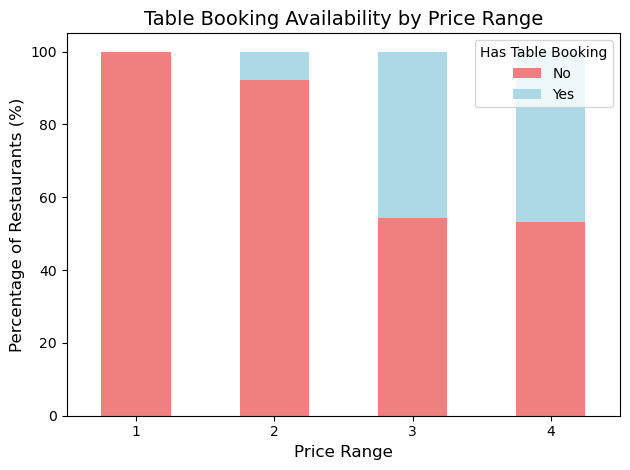

In [186]:


# Calculate percentage of restaurants with online delivery in each price range
delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
table_booking_by_price = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack() * 100

# Plot the results for online delivery
plt.figure(figsize=(10, 6))
delivery_by_price.plot(kind='bar', stacked=True, color=['lightgreen', 'skyblue'])
plt.title('Online Delivery Availability by Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Percentage of Restaurants (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Has Online Delivery', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Plot the results for table booking
plt.figure(figsize=(10, 6))
table_booking_by_price.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Table Booking Availability by Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Percentage of Restaurants (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Has Table Booking', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()
